In [2]:
import torch
import matplotlib.pyplot as plt

tensor([[0.0000, 4.1855, 0.0000, 1.1425, 0.0000, 1.1041, 0.0000, 0.0000, 1.6307,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.2892, 0.0000, 0.0000, 1.9929, 0.0000,
         0.0000],
        [1.7825, 0.0000, 0.0000, 0.0000, 0.0000, 1.2332, 0.0000, 3.0332, 2.5304,
         1.1881],
        [0.0000, 1.1138, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [1.0800, 1.2497, 2.8355, 0.0000, 0.0000, 0.0000, 0.0000, 1.4635, 0.0000,
         0.0000],
        [0.0000, 1.4527, 0.0000, 1.0583, 1.1240, 0.0000, 0.0000, 0.0000, 1.0352,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.5209, 3.8482, 0.0000,
         1.9979],
        [0.0000, 0.0000, 1.0281, 1.7562, 0.0000, 0.0000, 0.0000, 0.0000, 1.9899,
         0.0000],
        [1.0365, 0.0000, 2.5430, 3.5209, 5.0505, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 1.2479, 0.0000, 1.0040, 0.0000, 0.0000, 2.7007,
         1.7449],
        [0

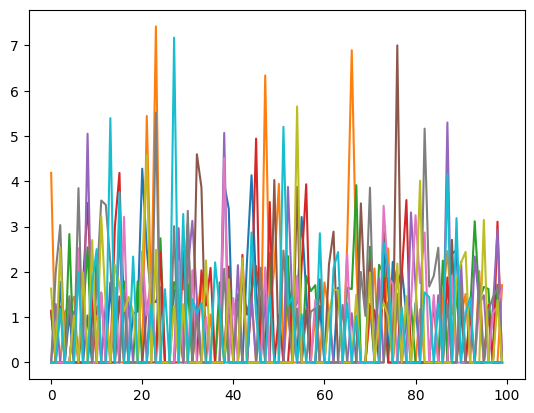

In [47]:
import torch
import matplotlib.pyplot as plt

# Create a generator with a fixed seed
#gen = torch.Generator().manual_seed(1337)

torch.manual_seed(1337)
# Parameters for the distribution
K = 10
T = 100
N=286

# Create an Exponential distribution with rate parameter 1.0
distribution = torch.distributions.exponential.Exponential(1.0)

# Sample from the distribution with the specified shape (K, T) using the generator
amplitudes = distribution.sample((T, K))
amplitudes[amplitudes<1]=0

# Print amplitudes to check
print(amplitudes)

# Plot the amplitudes
plt.plot(amplitudes)
plt.show()


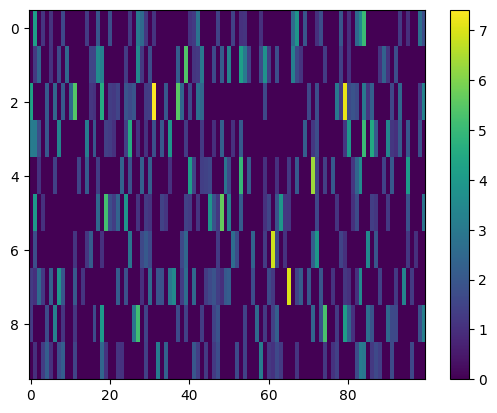

In [16]:
plt.imshow(amplitudes,aspect='auto')
plt.colorbar()

In [17]:
amplitudes==0.0

tensor([[ True, False,  True, False,  True, False,  True,  True, False,  True,
          True,  True,  True,  True, False,  True,  True, False,  True,  True,
         False,  True,  True,  True,  True, False,  True, False, False, False,
          True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         False, False, False,  True,  True,  True,  True, False,  True,  True,
          True, False,  True, False, False,  True,  True,  True, False,  True,
          True,  True,  True,  True,  True,  True, False, False,  True, False,
          True,  True, False, False,  True,  True,  True,  True, False,  True,
         False,  True, False, False, False,  True,  True,  True,  True,  True,
          True,  True,  True, False,  True, False,  True,  True, False, False],
        [ True, False, False,  True,  True, False,  True, False,  True, False,
          True,  True,  True,  True,  True, False, False, False, False,  True,
          True,  True,  True,  True, False,  True, 

In [43]:
weights = torch.distributions.Uniform(0, 1).sample((N, K))

# Calculate the Gram matrix: weights.T @ weights
gram_matrix = weights.T @ weights

# Extract the diagonal elements (which are the squared column norms)
squared_norms = gram_matrix.diag()

# Take the square root of the diagonal elements to get the column norms
column_lengths = torch.sqrt(squared_norms)

# Normalize each column by its respective length
normalized_weights = weights / column_lengths


In [44]:
normalized_weights
normalized_weights.shape

torch.Size([286, 10])

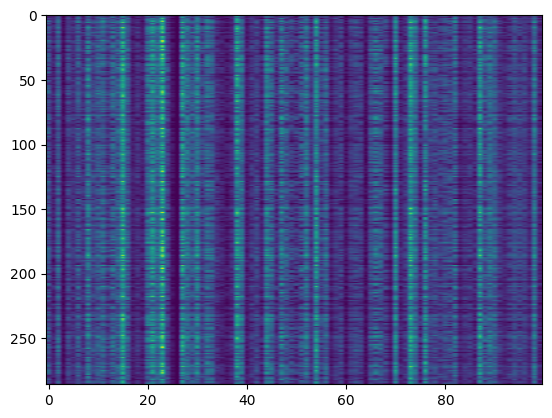

In [ ]:
plt.imshow(normalized_weights@amplitudes.T,aspect='auto')